## Terminologies

Training example pair is denoted by $(x^i, y^i)$.  
$m$ denotes the number of training examples.  
$X$ is the space of input values, whereas $Y$ is the space of output values.  
A learning function (called hypothesis) $h(x) = y$.

## Hypothesis function

For linear regression, the hypothesis function in case of one feature is $$h(x) = \theta_0 + \theta_1 x$$  
In case of multiple features, $$h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$$

## Cost Function

The accuracy of the hypothesis can be measured using a cost function. A *squared error function* (in case of single feature) is defined as $$J(\theta_0 , \theta_1) = \frac{1}{2m} \sum^{m}_{i=1}(h(x^i) - y^i)^2$$
The aim is to minimise the cost function $J(\theta_0 , \theta_1)$ . 

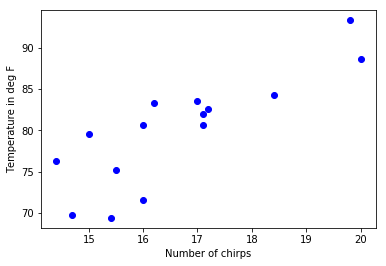

In [13]:
# Cricket chirps vs temperature
chirps = [20, 16, 19.8, 18.4, 17.1, 15.5, 14.7, 17.1, 15.4, 16.2, 15, 17.2, 16, 17, 14.4]
temperature = [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 82, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5, 76.3]

# imports
import numpy as np
import matplotlib.pyplot as plt

np_chirps = np.array(chirps)
np_temp = np.array(temperature)

plt.xlabel('Number of chirps')
plt.ylabel('Temperature in deg F')
plt.plot(np_chirps, np_temp, 'bo')

Let us take $\theta_0 = 35$ and $\theta_1 = 2.75$. In that case $h(x) =35 + 2.75x$. Plotting the hypothesis function, we get:

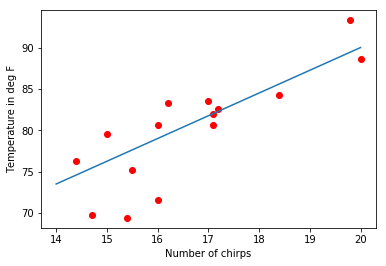

In [14]:
x_chirps = np.linspace(14,20,10)

# our hypothesis function
def hyp(x):
    return 35 + 2.75*x

y_chirps = np.linspace(14,20,10)
for i in range(len(x_chirps)):
    y_chirps[i] = hyp(x_chirps[i])
    
plt.xlabel('Number of chirps')
plt.ylabel('Temperature in deg F')
plt.plot(np_chirps, np_temp, 'ro', x_chirps, y_chirps)

In [18]:
# Defining our hypothesis function
def hyp_(x, t0 = 0, t1 = 1):
    return t0 + t1*x

# Defining cost function
def mse_cost_(t0, t1, hyp, training_x, training_y):
    m = len(training_x)
    J = 0 # the cost value
    
    for i in range(m):
        J += (hyp(training_x[i], t0, t1) - training_y[i])**2
        
    return J/(2*m)

cost = mse_cost_(35, 2.75, hyp_, np_chirps, np_temp)
print('Cost function value for the above hypothesis function is: ' + str(cost))

Cost function value for the above hypothesis function is: 7.03366666667


Now let us calculate the cost function by changing $\theta_1$ over a range from -5 to 10

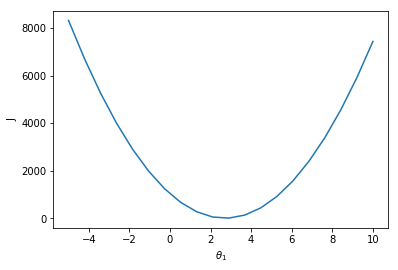

In [23]:
t1_range = np.linspace(-5, 10, 20)
costs_list = []

for i in range(len(t1_range)):
    costs_list.append(mse_cost_(35, t1_range[i], hyp_, np_chirps, np_temp))
    
np_costs = np.array(costs_list)

plt.xlabel(r'$\theta_1$')
plt.ylabel('J')
plt.plot(t1_range, np_costs)

From the above plot we can see that $J$ is minimum around $\theta_1 = 1$

## Gradient Descent

The gradient points in the direction of the greatest rate of increase of the function. For cartesian coordinates it is defined as
  
$$\nabla f = \frac{\partial f}{\partial x}\vec{i} + \frac{\partial f}{\partial y}\vec{j} + \frac{\partial f}{\partial z}\vec{k}$$

Here $f$ is the cost function $J$ and $\theta_0$ and $\theta_1$ are the two coordinates. How gradient descent works is, you repeat until convergence the following :
  
$$\theta_0 := \theta_0 - \alpha\frac{\partial J(\theta_0, \theta_1)}{\partial \theta_0}$$ $$\theta_1 := \theta_1 - \alpha\frac{\partial J(\theta_0, \theta_1)}{\partial \theta_1}$$

$\alpha$ is called *learning rate*. It determines how fast/slow you descend towards minima. Two things to note are:
- if $\alpha$ is too small gradient descent will take long time
- if $\alpha$ is large, gradient descent can overshoot minima, fail to converge or even diverge  

Also we need not change the value of $\alpha$.  
For linear regression on applying gradient descent,  

$$\theta_0 := \theta_0 - \alpha\frac{1}{m}\sum^{m}_{i=1}(h(x^i) - y^i)$$
$$\theta_1 := \theta_1 - \alpha\frac{1}{m}\sum^{m}_{i=1}(h(x^i) - y^i)x^i$$

In [51]:
# Gradient descent
def grad_descent(t0, t1, alpha, hyp, training_x, training_y):
    # for t0
    t0_n = t0
    t0_p = t0
    t1_n = t1
    t1_p = t1
    while True:
        J_p = mse_cost_(t0_p, t1_p, hyp, training_x, training_y) # Previous cost function
        sum_0 = 0
        sum_1 = 0
        m = len(training_x)
        for i in range(m):
            sum_0 += hyp(training_x[i], t0_p, t1_p) - training_y[i]
            sum_1 += (hyp(training_x[i], t0_p, t1_p) - training_y[i])*training_x[i]
        t0_n = t0_p - (alpha*sum_0)/m 
        t1_n = t1_p - (alpha*sum_1)/m
        J_n = mse_cost_(t0_n, t1_n, hyp_, training_x, training_y) # New cost function
        # test for convergence (or not)
        # declare convergence if J decreases by less than 0.001 (not for all cases)
        if(J_p - J_n < 0.001 or J_n > J_p): 
            break
        t0_p = t0_n
        t1_p = t1_n
        
        
    return t0_n, t1_n

t0_, t1_ = grad_descent(20, 1.9, 0.001, hyp_, np_chirps, np_temp)
print('Parameter 1 is: ' + str(t0_))
print('Parameter 2 is: ' + str(t1_))

Parameter 1 is: 25.2318263692
Parameter 2 is: 3.2911230353


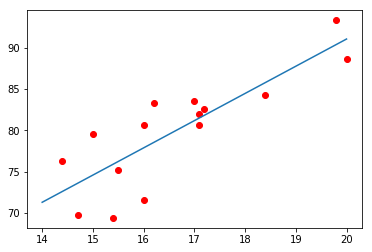

In [50]:
x_chirps_2 = np.linspace(14,20,10)
y_chirps_2 = np.linspace(14,20,10)
for i in range(len(x_chirps_2)):
    y_chirps_2[i] = hyp_(x_chirps[i], 25.23, 3.29)
    
plt.plot(np_chirps, np_temp, 'ro', x_chirps_2, y_chirps_2)

## Multiple features

$x^i_j$ means jth feature of the ith training example.  
Hypothesis function is
  
$$h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$$
$$h(x) = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$$
where $x_0 = 1$
  
In matrix form,
$$\theta = \begin{bmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_n \\
\end{bmatrix}
$$
  
$$h(x) = \begin{bmatrix}
\theta_0 && \theta_1 && \ldots && \theta_n
\end{bmatrix}
\begin{bmatrix}
x_0 \\
x_1 \\
\vdots \\
x_n \\
\end{bmatrix} = \theta^T x
$$

## Gradient Descent for Multiple Variables

On applying gradient descent for multiple features we get,
  
$$\theta_0 := \theta_0 - \alpha\frac{1}{m}\sum^{m}_{i=1}(h(x^i) - y^i)x^i_0$$
$$\theta_1 := \theta_1 - \alpha\frac{1}{m}\sum^{m}_{i=1}(h(x^i) - y^i)x^i_1$$
$$\vdots$$
$$\theta_n := \theta_n - \alpha\frac{1}{m}\sum^{m}_{i=1}(h(x^i) - y^i)x^i_n$$

## Feature scaling and Mean Normalization

When applying gradient decent to multiple variables we should aim to bring the range of every feature close to each other. To do this we use feature scaling.
  
$$x_i := \frac{x_i}{s_i}$$
Where $s_i$ is (max - min) ie. the range of ith feature.
  
For mean normalization the formula is
  
$$x_i := \frac{x_i - \mu_i}{s_i}$$
Where $\mu_i$ is the average value of the ith feature.

## Normal Equation

Normal equation method is another way of minimising the cost function. We do this by explicitly taking derivative of $J$ w.r.t each parameter and setting that to zero.
  
$$\frac{\partial J(\theta_0, \theta_1, \ldots, \theta_n)}{\partial \theta_0} = 0$$
$$\frac{\partial J(\theta_0, \theta_1, \ldots, \theta_n)}{\partial \theta_1} = 0$$
$$\vdots$$
$$\frac{\partial J(\theta_0, \theta_1, \ldots, \theta_n)}{\partial \theta_n} = 0$$
  
Let,
  
$$X = \begin{bmatrix}
1 && x^1_1 && x^1_2 && \ldots && x^1_n \\
1 && x^2_1 && x^2_2 && \ldots && x^2_n \\
\vdots && \vdots && \vdots && \ldots && \vdots \\
1 && x^m_1 && x^m_2 && \ldots && x^m_n \\
\end{bmatrix}
$$  
  
Here each row is a unique training data, and each column contains a specific feature.
  
$$y = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m \\
\end{bmatrix}
$$
  
Then $\theta$ that minimises the cost function is given by:
  
$$\theta = (X^T X)^{-1}X^T y$$

In [55]:
## Using normal equation for the cricket chirp case
X = [[1, x] for x in chirps]
np_X = np.array(X)

np_y = np.array(temperature).reshape(len(temperature),1)
np_theta = np.dot(np.dot(np.linalg.inv(np.dot(np_X.T, np_X)), np_X.T), np_y)
print(np_theta)

[[ 25.2323131 ]
 [  3.29109409]]


The answer obtained above is the same as we got by using gradient descent. And it got calculated much faster.

## Using `scikit learn`

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

chirps = [20, 16, 19.8, 18.4, 17.1, 15.5, 14.7, 17.1, 15.4, 16.2, 15, 17.2, 16, 17, 14.4]
chirps_feature = [[i] for i in chirps]
temperature = [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 82, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5, 76.3]
temperature_feature = temperature

reg = linear_model.LinearRegression()

# train
reg.fit(chirps_feature, temperature_feature)

# get coefficients
print("theta_1: " + str(reg.coef_))
print("theta_0: " + str(reg.intercept_))


theta_1: [3.29109409]
theta_0: 25.232313104083083
